In [ ]:
#We solve the problem of the convection-diffusion equation

Convection-diffusion equation along a rod. Thelength is L and $0<x<L$. 
The ODE equation is
\begin{equation}
- \frac{d^2 \theta}{d x^2}+m^2 \theta=0
\end{equation}
Boundary conditions:\
$\theta(0)=300$ and $d \theta/dx(L)=0$ 


In [2]:
#Importing the packages
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sp

[[ 1.          0.          0.        ]
 [-0.60213859  1.36135682 -0.60213859]
 [ 0.         -0.60213859  0.68067841]]


<function matplotlib.pyplot.show(close=None, block=None)>

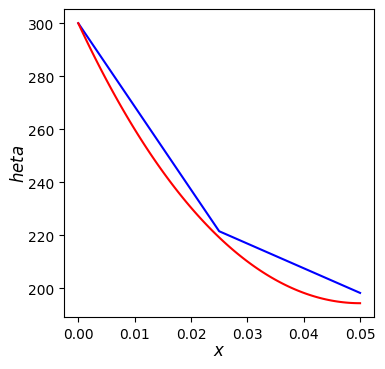

In [25]:
fig=plt.figure(figsize=(4,4))

L=0.05
A=np.pi*(0.02**2)/4*50
M=100*np.pi*0.02
m=M/A
T0=300

n=2
l=2
p=(l-1)*n+1
h=L/n

Ke=np.array([[1, -1], [-1, 1]])
Diag=np.diag(Ke)
for j in range(n-1):
    Diag=np.concatenate((Diag[:-1], Diag[-1]+Diag[0],Diag[1:]),axis=None)

Le=np.array([[2, 1], [1, 2]])
LeDiag=np.diag(Le)
for j in range(n-1):
    LeDiag=np.concatenate((LeDiag[:-1], LeDiag[-1]+LeDiag[0], LeDiag[1:]),axis=None)


K=A/h*(sp.spdiags(-1*np.ones((2,p)),[-1, 1],p,p)+sp.spdiags(Diag,0,p,p))
LL=M*h/6*(sp.spdiags(1*np.ones((2,p)),[-1, 1],p,p)+sp.spdiags(LeDiag,0,p,p))

Ktot=K+LL
Ktot=Ktot.toarray()


Ktot[0,:]=np.append(1, np.zeros(p-1))

print(Ktot)
fe=M*20*h/2*np.ones(p,)
fe[0]=T0

 
Tn=np.linalg.solve(Ktot,fe)

x=np.linspace(0,L,100)
Theta=T0*np.cosh(np.sqrt(m)*(L-x))/(np.cosh(np.sqrt(m)*L))

#To plot we firsly take the points of the mesh
xn=np.linspace(0,L,p)
plt.plot(xn,Tn,color='blue')
plt.plot(x,Theta,color='red')
plt.xlabel('$x$', fontsize=12, labelpad=0.05)
plt.ylabel('$\theta$', fontsize=12, labelpad=0.05)
plt.show


In [41]:
1/h
m**2*h/6*2-4

13329.333333333334